## EM in GMM
Q: EM algorithm can be used to estimate parameters in a Gaussian mixture models and the hidden parameter (proportion of  each distribution). Here's an example. 

Suppose the weight of male $W_m$ follows $N(\mu_1,\sigma_1^2)$ and the weight of female $W_f$ follows $N(\mu_2,\sigma_2^2)$. We observe a group of data points $X = (x_1,x_2,...x_n)$, which are extracted from either $W_m$ or $W_f$.What are estimated $\mu_1,\mu_2,\sigma_1,\sigma_2,\pi_1, \pi_2$?

### Simple Random Normal

/Users/rdu/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/rdu/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


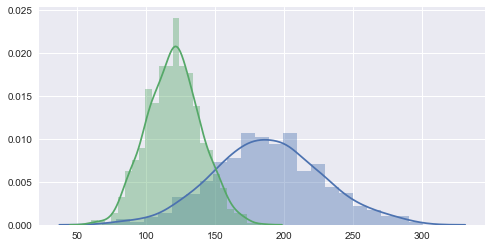

In [1]:
# Generate samples
import numpy as np
import pandas as pd
import random
from scipy.stats import norm
from matplotlib import pyplot as plt
import math
import seaborn as sns
%matplotlib inline

rng = np.random.RandomState(0)

n = 1000
mu1,sigma1 = 190,40
mu2,sigma2 = 120,20
wm = rng.normal(mu1,sigma1,n)
wf = rng.normal(mu2,sigma2,n)
weight = np.where(np.random.rand(n)<0.75,wm,wf)
# weight = np.concatenate([np.random.normal(mu, sigma, int(pi*n))
#                     for pi, mu, sigma in zip([0.75,0.25],[190,120],[40,20])])

plt.figure(figsize=(8,4))
sns.distplot(pd.Series(wm),hist=True)
sns.distplot(pd.Series(wf),hist=True)

/Users/rdu/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


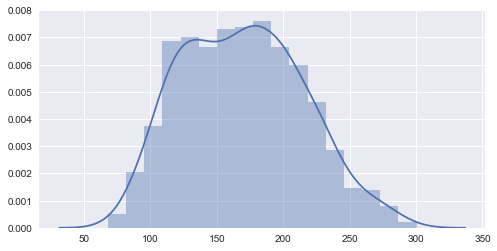

In [2]:
plt.figure(figsize=(8,4))
sns.distplot(pd.Series(weight),hist=True)

In [3]:
def gauss(x,mu,sigma):
    y = -((x-mu)/sigma)**2/2
    res = math.exp(y)/(math.sqrt(2*math.pi)*sigma)
    return res

In [4]:
def calcEM(weight, mp_init, mu_init, sigma_init, iters):
    N = len(weight)
    mp, fp = mp_init[0], mp_init[1]
    mmu, fmu = mu_init[0], mu_init[1]
    msigma, fsigma = sigma_init[0], sigma_init[1]
    mpi = list(range(N))
    fpi = list(range(N))
    cur = [mp,fp,mmu,msigma,fmu,fsigma]
    now = []
    
    times = 0
    while times < iters:
        i = 0
        for x in weight:
            mpi[i] = mp*gauss(x,mmu,msigma)
            fpi[i] = fp*gauss(x,fmu,fsigma)
            s = mpi[i] + fpi[i]
            mpi[i]/=s
            fpi[i]/=s
            i += 1
        
        mn = sum(mpi)
        fn = sum(fpi)
        mp = mn/N
        fp = fn/N
        mmu = sum([p*x for (p,x) in zip(mpi,weight)])/mn
        fmu = sum([p*x for (p,x) in zip(fpi,weight)])/fn
        msigma = math.sqrt(sum([p*(x-mmu)**2 for (p,x) in zip(mpi,weight)])/mn)
        fsigma = math.sqrt(sum([p*(x-fmu)**2 for (p,x) in zip(fpi,weight)])/fn)
        
        now = [mp,fp,mmu,msigma,fmu,fsigma]
        if isSame(cur,now):
            break
        cur = now
        print ("Times:\t {}".format(times))
        print ("Male mean: {}, sigma: {}".format(mmu,msigma))
        print ("Female mean: {}, sigma: {}".format(fmu,fsigma))
        print ("Male portion: {}, female portio: {}".format(mp,fp))
        times += 1
    return now

def isSame(lst1,lst2):
    return (sum([(i-j)**2 for (i,j) in zip(lst1,lst2)]) < 0.001)
        

In [5]:
calcEM(weight,[0.5,0.5],[max(weight),min(weight)],[10,10],1000)

Times:	 0
Male mean: 216.9738170242178, sigma: 25.296924003772542
Female mean: 139.94090127652666, sigma: 27.076229827707106
Male portion: 0.3856702382753587, female portio: 0.6143297617246417
Times:	 1
Male mean: 214.28633128249479, sigma: 28.175740929857245
Female mean: 141.09266426130313, sigma: 29.164178515684256
Male portion: 0.3901640831632761, female portio: 0.6098359168367247
Times:	 2
Male mean: 212.75096673763005, sigma: 29.593494116044138
Female mean: 141.56044163042122, sigma: 30.05507133560913
Male portion: 0.39457164524719285, female portio: 0.6054283547528077
Times:	 3
Male mean: 211.72808038692614, sigma: 30.45186194241575
Female mean: 141.75214853739624, sigma: 30.504438720277726
Male portion: 0.3986807316918301, female portio: 0.6013192683081692
Times:	 4
Male mean: 210.97825204184704, sigma: 31.023468716356195
Female mean: 141.79725751965427, sigma: 30.740805312294587
Male portion: 0.40260980520300804, female portio: 0.5973901947969918
Times:	 5
Male mean: 210.391035

Male mean: 198.47468358196969, sigma: 35.29163761427612
Female mean: 131.28161117300067, sigma: 25.81931706360808
Male portion: 0.5710200724481566, female portio: 0.42897992755184333
Times:	 50
Male mean: 198.218683037356, sigma: 35.37442868520829
Female mean: 131.02754918717883, sigma: 25.682448970933415
Male portion: 0.5748177303708931, female portio: 0.4251822696291072
Times:	 51
Male mean: 197.96327138595257, sigma: 35.457668861211715
Female mean: 130.77454024923236, sigma: 25.545757624593847
Male portion: 0.5786039316570061, female portio: 0.4213960683429945
Times:	 52
Male mean: 197.70855744949012, sigma: 35.54131962110298
Female mean: 130.52272911083384, sigma: 25.40931929721318
Male portion: 0.5823769104985201, female portio: 0.41762308950147975
Times:	 53
Male mean: 197.454654328346, sigma: 35.62534006752749
Female mean: 130.27226461953256, sigma: 25.273213164074313
Male portion: 0.5861348457404739, female portio: 0.413865154259526
Times:	 54
Male mean: 197.2016790888794, sigm

Male mean: 188.32657611425142, sigma: 39.07541324167747
Female mean: 122.06693959749148, sigma: 20.45560301488182
Male portion: 0.7181334995469992, female portio: 0.28186650045300055
Times:	 102
Male mean: 188.2216936466837, sigma: 39.11951417766815
Female mean: 121.98667713135174, sigma: 20.40142979013685
Male portion: 0.719612217588854, female portio: 0.28038778241114715
Times:	 103
Male mean: 188.1200175424349, sigma: 39.1623350595144
Female mean: 121.90925072829764, sigma: 20.348885245678648
Male portion: 0.721045168585676, female portio: 0.27895483141432464
Times:	 104
Male mean: 188.0214816116103, sigma: 39.20389573925328
Female mean: 121.83457521725124, sigma: 20.29793332941075
Male portion: 0.7224333578281352, female portio: 0.2775666421718656
Times:	 105
Male mean: 187.9260185749156, sigma: 39.24421717421931
Female mean: 121.76256645171775, sigma: 20.24853795562112
Male portion: 0.7237777996695002, female portio: 0.2762222003305006
Times:	 106
Male mean: 187.83356029841363, si

[0.7527451154137814,
 0.24725488458621825,
 185.86427201780367,
 40.12535887078341,
 120.2879425675136,
 19.165192334382944]

### Multivariate Normal

In [6]:
import scipy.stats as st
from scipy.stats import multivariate_normal as mvn
from numpy.core.umath_tests import matrix_multiply as mm

In [7]:
def em_gmm_vect(xs, pis, mus, sigmas, tol=0.01, max_iter=100):

    n, p = xs.shape
    k = len(pis)

    ll_old = 0
    for i in range(max_iter):
        exp_A = []
        exp_B = []
        ll_new = 0

        # E-step
        ws = np.zeros((k, n))
        for j in range(k):
            ws[j, :] = pis[j] * mvn(mus[j], sigmas[j]).pdf(xs)
        ws /= ws.sum(0)

        # M-step
        pis = ws.sum(axis=1)
        pis /= n

        mus = np.dot(ws, xs)
        mus /= ws.sum(1)[:, None]

        sigmas = np.zeros((k, p, p))
        for j in range(k):
            ys = xs - mus[j, :]
            sigmas[j] = (ws[j,:,None,None] * mm(ys[:,:,None], ys[:,None,:])).sum(axis=0)
        sigmas /= ws.sum(axis=1)[:,None,None]

        # update complete log likelihoood
        ll_new = 0
        for pi, mu, sigma in zip(pis, mus, sigmas):
            ll_new += pi*mvn(mu, sigma).pdf(xs)
        ll_new = np.log(ll_new).sum()

        if np.abs(ll_new - ll_old) < tol:
            break
        ll_old = ll_new

    return (ll_new, pis, mus, sigmas)

In [8]:
np.random.seed(123)

# create data set
n = 1000
_mus = np.array([[0,4], [-2,0]])
_sigmas = np.array([[[3, 0], [0, 0.5]], [[1,0],[0,2]]])
_pis = np.array([0.6, 0.4])
xs = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*n))
                    for pi, mu, sigma in zip(_pis, _mus, _sigmas)])

# initial guesses for parameters
pis = np.random.random(2)
pis /= pis.sum()
mus = np.random.random((2,2))
sigmas = np.array([np.eye(2)] * 2)

In [9]:
%%time
ll1, pis1, mus1, sigmas1 = em_gmm_vect(xs, pis, mus, sigmas)

CPU times: user 16.8 ms, sys: 2.24 ms, total: 19 ms
Wall time: 17.2 ms


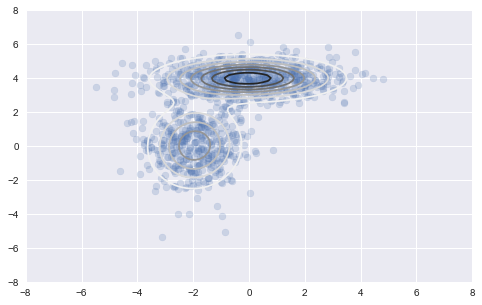

In [10]:
intervals = 101
ys = np.linspace(-8,8,intervals)
X, Y = np.meshgrid(ys, ys)
_ys = np.vstack([X.ravel(), Y.ravel()]).T

z = np.zeros(len(_ys))
for pi, mu, sigma in zip(pis1, mus1, sigmas1):
    z += pi*mvn(mu, sigma).pdf(_ys)
z = z.reshape((intervals, intervals))

# ax = plt.subplot(111)
plt.figure(figsize=(8,5))
plt.scatter(xs[:,0], xs[:,1], alpha=0.2)
plt.contour(X, Y, z)
# plt.axis([-8,6,-6,8])
# ax.axes.set_aspect('equal')
# plt.tight_layout()